In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2


In [2]:
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
from matplotlib.patches import Circle
from scipy.special import gamma
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from numpy import exp, sqrt
from scipy.integrate import quad, dblquad, nquad
import matplotlib.patches as patches
from itertools import product
from scipy.integrate import quad
import scipy.optimize as optimize
from  scipy.interpolate import interp1d
from scipy.misc import derivative
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import KDTree
import sys
import glob
from unsio import *
import os
import wkbl
from wkbl.astro.halo_info import *
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib import cm
import wkbl.astro.nbody_essentials as nbe
import cfalcon
CF =cfalcon.CFalcon()
from matplotlib.colors import LogNorm
from matplotlib.ticker import FormatStrFormatter
from matplotlib import rc
import datetime
from scipy.misc import derivative
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
from lmfit import Model
from scipy.optimize import curve_fit
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [50]:
HALOB = np.loadtxt("../../datafiles/rho_vs_t_FILES/HALOB1kpc/fdv_HALOB417_50bins.txt")
#HALOB = np.loadtxt("../../datafiles/rho_vs_t_FILES/Mochima1kpc/fdv_Mo_SF041.txt")

# Generalized Gaussian

In [51]:
def gaussian(x, mu, sig,alpha):
    def fun(x, mu, sig,alpha):return exp(-((x-mu)**2 / sig**2)**alpha)
    uno = np.linspace(1,1000,1000)
    dos = fun(uno, mu, sig,alpha)
    N = np.trapz(dos, uno)
    return Ntot*fun(x, mu, sig, alpha)/N    
    

In [52]:
Ntot  = 32689.
gmodel = Model(gaussian)
params = gmodel.make_params(mu=250, N=Ntot/10, sig=140,alpha=1.)
re_GenGau = gmodel.fit(Ntot*HALOB[:,1], params, x=HALOB[:,0])
print(re_GenGau.fit_report())

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 50
    # variables        = 3
    chi-square         = 519.898837
    reduced chi-square = 11.0616774
    Akaike info crit   = 123.080562
    Bayesian info crit = 128.816631
[[Variables]]
    mu:     251.254257 +/- 0.92219845 (0.37%) (init = 250)
    sig:    155.876263 +/- 1.16681437 (0.75%) (init = 140)
    alpha:  1.32608662 +/- 0.04025922 (3.04%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig, alpha) =  0.448



# Generalized Maxwelian

In [53]:
def generalize_Maxwelian(x, sig,alpha):
    def fun(x, sig,alpha):return x**2 * exp(-(x**2 / sig**2)**alpha)
    uno = np.linspace(1,1000,1000)
    dos = fun(uno, sig,alpha)
    N = np.trapz(dos, uno)
    return Ntot*fun(x, sig,alpha)/N

In [54]:
Ntot  = 32689.
gm_model = Model(generalize_Maxwelian)
params_gm = gm_model.make_params(sig=266.,alpha=1.2)
re_GenMax = gm_model.fit(Ntot*HALOB[:,1], params_gm, x=HALOB[:,0])
print(re_GenMax.fit_report())

[[Model]]
    Model(generalize_Maxwelian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 50
    # variables        = 2
    chi-square         = 1066.88975
    reduced chi-square = 22.2268698
    Akaike info crit   = 157.023996
    Bayesian info crit = 160.848042
[[Variables]]
    sig:    264.538767 +/- 3.83509352 (1.45%) (init = 266)
    alpha:  1.23185213 +/- 0.03179613 (2.58%) (init = 1.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig, alpha) =  0.941



In [55]:
def fun(x, sig,alpha):return x**2 * exp(-(x**2 / sig**2)**alpha)
dos = fun(HALOB[:,0], re_GenMax.params['sig'].value,re_GenMax.params['alpha'].value)
N = np.trapz(dos, HALOB[:,0])
re_GenMax.chisqr

1066.8897512283168

# Tsallis 

In [56]:
def tsallis(x,sig,q):
    def fun(x,sig,q):return np.nan_to_num(x**2 *((1-(1-q)*(x**2 / sig**2))**(q/(1-q))))
    uno = np.linspace(1,1000,1000)
    dos = fun(uno, sig,q)
    N = np.trapz(dos, uno)
    return Ntot*fun(x, sig,q)/N

In [57]:
Ntot  = 32689.
ta_model = Model(tsallis)
params_ta = ta_model.make_params(sig=266,q=1.2)
re_Tsallis = ta_model.fit(Ntot*HALOB[:,1], params_ta, x=HALOB[:,0])
print(re_Tsallis.fit_report())

[[Model]]
    Model(tsallis)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 50
    # variables        = 2
    chi-square         = 621.782109
    reduced chi-square = 12.9537939
    Akaike info crit   = 130.028336
    Bayesian info crit = 133.852382
[[Variables]]
    sig:  245.882269 +/- 1.43638357 (0.58%) (init = 266)
    q:    0.86378724 +/- 0.01030784 (1.19%) (init = 1.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig, q) = -0.785



In [58]:
fig, ax = plt.subplots(figsize=[7,6])
fonto=19
ax.set_xlabel(r"$\rm v\;[km/s]$",fontsize=fonto )
ax.set_ylabel(r"$f(v)$",fontsize=fonto )
ax.set_xlim([HALOB[:,0].min(),HALOB[:,0].max()])
ax.set_ylim([0,0.0041])
ax.bar(HALOB[:,0], HALOB[:,1],width=HALOB[1,0]-HALOB[0,0],color='gray',alpha=0.8)
p = re_GenGau.params
ax.plot(HALOB[:,0],gaussian(HALOB[:,0],
                            p['mu'].value,
                            p['sig'].value,
                            p["alpha"].value)/Ntot,
        color='r',
        label=r"$\rm Generalized \;Gaussian$"
       )
p = re_GenMax.params
ax.plot(HALOB[:,0],generalize_Maxwelian(HALOB[:,0],
                            p['sig'].value,
                            p["alpha"].value)/Ntot,
        color='k',
        label=r"$\rm Generalized\;Maxwellian$"
       )

p = re_Tsallis.params
ax.plot(HALOB[:,0],tsallis(HALOB[:,0],
                            p['sig'].value,
                            p["q"].value)/Ntot,
        color='b',
        label=r"$\rm Tsallis$")
ax.text(350,0.0035,r"$\rm Mochima$",fontsize=fonto)

leg = ax.legend(loc='lower center', ncol=1, shadow=False, fontsize=14)
leg.get_frame().set_linewidth(0.0)
ax.tick_params(axis='both', which='major', labelsize=15, size=5,width=1.2)
plt.tight_layout()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


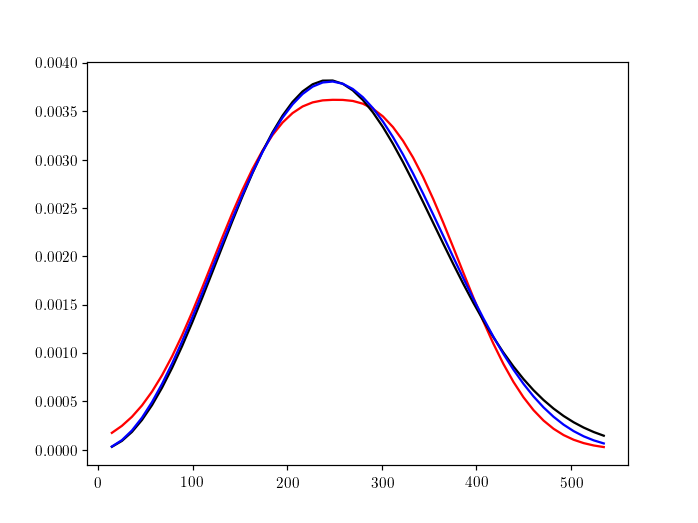

In [59]:
fig, ax =plt.subplots()
p = re_GenGau.params
ax.plot(HALOB[:,0],gaussian(HALOB[:,0],
                            p['mu'].value,
                            p['sig'].value,
                            p["alpha"].value)/Ntot,
        color='r',
        label=r"$\rm Generalized Gaussian$"
       )
p = re_GenMax.params
ax.plot(HALOB[:,0],generalize_Maxwelian(HALOB[:,0],
                            p['sig'].value,
                            p["alpha"].value)/Ntot,
        color='k',
        label=r"$\rm Generalized Maxwellian$"
       )

p = re_Tsallis.params
ax.plot(HALOB[:,0],tsallis(HALOB[:,0],
                            p['sig'].value,
                            p["q"].value)/Ntot,
        color='b',
        label=r"$\rm Tsallis")

leg = ax.legend(loc='lower left', ncol=1, shadow=False, fontsize=15)
leg.get_frame().set_linewidth(0.0)